## SPAM CLASSIFIER PROJECT

### Coding Part

In [1]:
# import Packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #Linear algebra
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
# Libraries
from sklearn import svm 

In [2]:
spam = pd.read_csv(r"C:\Users\Vaibhav\Desktop\Yantra Byte Courses\Publication project\Spambase project\emails.csv")

In [3]:
spam.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


Info about our spam email data:
- The csv file emails.csv contains the count of each words which are frequent in the spam or ham emails .
- Most of these type of emails have similar contents and similar words so we can easily differentiate by seeing these keywords which is spam or ham and which are useful emails.

In [4]:
spam.shape

(5172, 3002)

In [5]:
spam.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


So the frequent words and their frequenvcy in each spam email can easily noticed by this spam.describe() snippet. 
- looking on above 'a' has occurred maximum no. of time but its general we must search for the words discount , free , sale,order, rate , down, pay, prices, rates , pricing, sell, interest, stocks,etc.

In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
spam1=spam.set_index('Email No.')
spam1

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5168,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
Email 5169,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
Email 5170,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
spam1.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

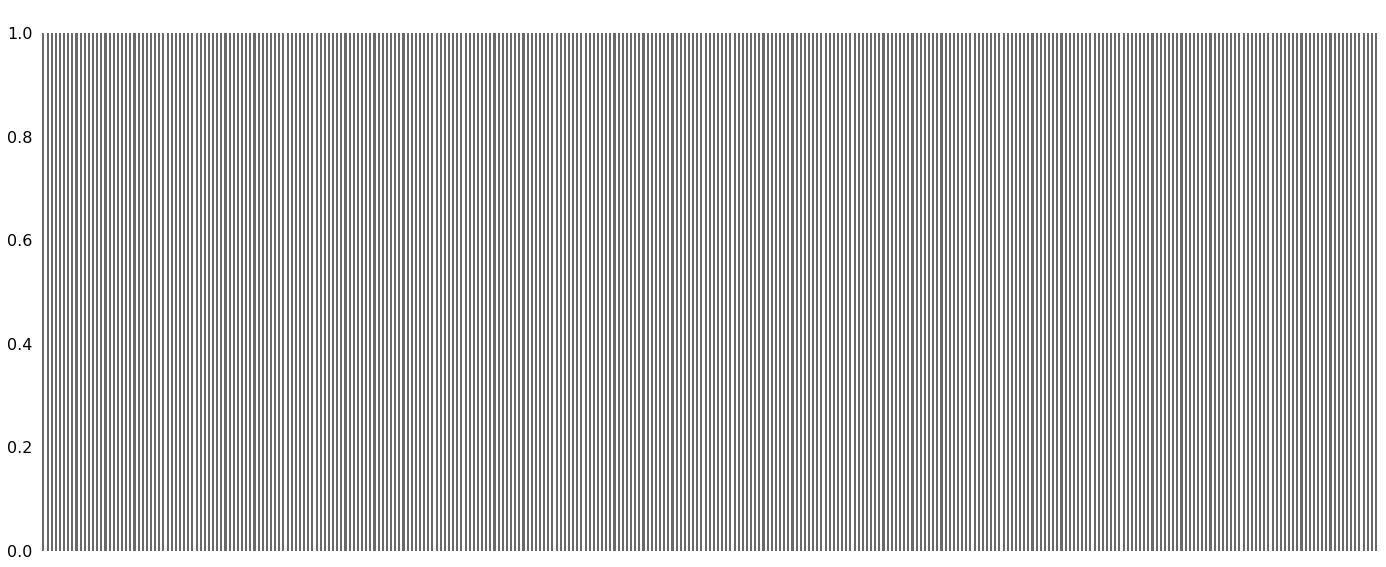

In [9]:
import missingno as msno
%matplotlib inline
msno.bar(spam)

Using missingno code we can visualize missing values in our data. so it seems our data have missing values denoted by white strips.

In [10]:
spam1.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
spam1.shape

(5172, 3001)

Since there is no change in our data after calling dropna function to remove unnecessary columns . Hence we need them in our prediction purpose to mark the emails as spam or ham.

### Naive Bayes Model

Spam email depends on keywords (discounts,sale etc ) more than cutoff probability.
- Bayes theorom-
 
 let c=class
 
 P(c|X) = P(x|c)* P(c)/ P(x)
- Naive bayes theorom-
 
 P(c|x) = P(x1|c)* P(x2|c)* P(x3|c)......

Naive Bayes can be punching bag/Benchmark model for smarter algo.

Now in this project we are clasifying mails typed in by the user as either 'Spam' or 'Not Spam'. Our original dataset was a folder of 5172 text files containing the emails.

Now let us understand why we have separated the words from the mails. This is because, this is a text-classification problem. When a spam classifier looks at a mail, it searches for potential words that it has seen in the previous spam emails. If it finds a majority of those words, then it labels it as 'Spam'.

CASES:

1: Let's take a word 'interest'. Assume, it's present in both 'Spam' and 'Not Spam' mails.

2: Let's consider a word 'lottery/discount'.Assume , it's present in only 'Spam' mails.

3: Let's consider a word 'free/cheap'. Assume, it's present only in spam.

- If now we received a test email, and it contains all the above mentioned three words, there's high probability that it is a 'Spam' mail.

- The most effective and basic algorithm for text-classification problems is the Naive Bayes algorithm, that works on the classic Bayes' theorem. This theorem works on every individual word in the test data to make predictions(the conditional probability with higher probability is the predicted result).

In [11]:
X= spam.iloc[:,1:3001]
y= spam.iloc[:,-1].values

In [12]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [13]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [15]:
mnb= MultinomialNB (alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
mnb.fit(X_train,y_train)
y_predNB = mnb.predict(X_test)
print("Accuracy Score for Naive Bayes : ", metrics.accuracy_score(y_predNB,y_test))

Accuracy Score for Naive Bayes :  0.9381443298969072


In [16]:
metrics.confusion_matrix(y_predNB,y_test)

array([[1028,   30],
       [  66,  428]], dtype=int64)

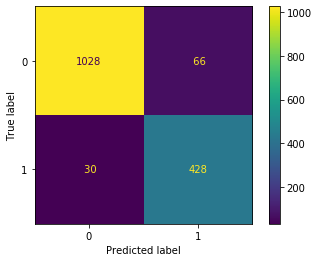

In [17]:
metrics.plot_confusion_matrix(mnb,X_test,y_test,values_format='3')

In [18]:
print(metrics.classification_report(y_predNB,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1058
           1       0.93      0.87      0.90       494

    accuracy                           0.94      1552
   macro avg       0.94      0.92      0.93      1552
weighted avg       0.94      0.94      0.94      1552



Precision : precision of the two classes have small difference hence accuracy remains 94% for our model . But we can even get better model let's work on svm and random forest too.

### SVM Model

SVM is a supervised machine learning technique used for classification and regression and outliers detection.

Advantages of svm:

- SVM works relatively well when there is clear margin of separation between classes.
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient.

In [19]:
# SVM Model Creation
svc= svm.SVC(random_state=123) 
svc.fit(X_train,y_train) 
y_predSVC= svc.predict(X_test)

In [20]:
# Model Evaluation (out of sample or test data or new data)
metrics.confusion_matrix(y_test,y_predSVC) 

array([[1067,   27],
       [ 302,  156]], dtype=int64)

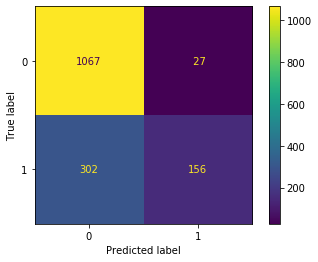

In [21]:
metrics.plot_confusion_matrix(svc,X_test,y_test,values_format='3')

In [22]:
print(metrics.classification_report(y_test,y_predSVC))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1094
           1       0.85      0.34      0.49       458

    accuracy                           0.79      1552
   macro avg       0.82      0.66      0.68      1552
weighted avg       0.80      0.79      0.75      1552



In [23]:
metrics.accuracy_score(y_test,y_predSVC)

0.7880154639175257

So as we can see accuracy of svm model is too low so we need to apply grid search in order to get best params but as we can see for another best model like bagging and boosting.

### Adaboost (Boosting technique)

Adaboost is a boosting technique.
- Adaboost takes whole data and run model on it and then predict results and then again we run model on sample of weighted errors.
- Adaboost and RF both use Decision tree but Ada use it in sequential manner but RF use it in parallel manner.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
Ada =AdaBoostClassifier(n_estimators=100, random_state=123)

In [26]:
Ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=123)

In [27]:
y_predAda=Ada.predict(X_test)

In [28]:
metrics.accuracy_score(y_test,y_predAda)

0.9710051546391752

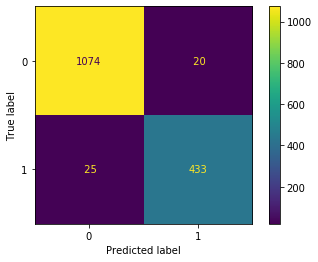

In [29]:
metrics.plot_confusion_matrix(Ada,X_test,y_test,values_format='3')

### Random forest model (Bagging)

In bagging we take different samples of Train data and train it on different model.
- Ensemble methods turn any feeble model into a highly powerful one. Let us see if ensemble model can perform better than Naive Bayes

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=123)
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on infromation gain('entropy')
rfc.fit(X_train,y_train)
y_predRFC = rfc.predict(X_test)
print("Accuracy Score of Random Forest Classifier : ", metrics.accuracy_score(y_predRFC,y_test))

Accuracy Score of Random Forest Classifier :  0.9690721649484536


In [31]:
metrics.confusion_matrix(y_predRFC,y_test)

array([[1078,   32],
       [  16,  426]], dtype=int64)

In [32]:
print(metrics.classification_report(y_predRFC,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1110
           1       0.93      0.96      0.95       442

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.96      1552
weighted avg       0.97      0.97      0.97      1552



Since the classification report clearly shows that 0- 'Spam mail' has more precision than 1- 'Not Spam mail'to predict for a mail to be spam or not hence we will get good accuracy of prediction.

So as we can see using RandomForset Classifier we're getting best accuracy about 97% than naive bayes model too as it is a benchmark model.
As expected, Random Forest Classifier performs the best among the three.
Decision tree classifiers are excellent classifiers. Random forest is a popular ensemble model that uses a forest of decision trees.

So, obviously, combibining the accuracy of 100 trees (as n_estimators=100), will create a powerful model.